# History of the Relations Between Supervisors and Students

In [1]:
import pandas as pd

In [2]:
supervision_df = pd.read_csv('relations.csv')
# supervision_df.drop_duplicates(inplace=True)
supervision_df.reset_index(drop=True, inplace=True)
supervision_df.head(10)

,supervisor,student
0,A. Carl Helmholz,Kent Terwilliger
1,A. Carl Helmholz,Lawrence W. Jones
2,A. Carl Helmholz,Barry Barish
3,A. David Buckingham,Brian Orr
4,A. David Buckingham,Laurence D. Barron
5,A. P. Balachandran,Pierre Ramond
6,Aaron Courville,Ian Goodfellow
7,Abba Lerner,Robert Fogel
8,Abdus Salam,Yuval Ne'eman
9,Abdus Salam,John Moffat (physicist)


Number of unique people in the dataset

In [3]:
len(set(supervision_df.student.tolist() + supervision_df.supervisor.tolist()))

7070

Number of unique students in the dataset

In [4]:
len(supervision_df.student.unique())

6517

Number of unique supervisors in the dataset

In [5]:
len(supervision_df.supervisor.unique())

2862

## TODO

- Set attributes for each (i.e. person) such as field, birthday, gender etc
- Interesting to see if the different components are associated with different fields, countries, generations...
- Homophily, how likely two people that have the same attribute are linked?
- Study how small we can make the seed and still manage to connect most people, as well as discovering who are the most important nodes
- ~~Remove duplicated with similar names searching for names that match in high percentage (e.g. Robert Solow and Robert M. Solow)~~

## Graph

In [6]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
from operator import itemgetter

In [7]:
graph = nx.from_pandas_edgelist(supervision_df, 'supervisor', 'student', edge_attr=None, create_using = nx.Graph())
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 7070
Number of edges: 8071
Average degree:   2.2832


The density of the graph is close to zero, which means that the number of edges is small compared to the number of nodes. A value of one represents a complete graph, and a value of zero a graph with no edges.

In [11]:
print("Network density: %.4f" %nx.density(graph))

Network density: 0.0003


In [12]:
comp = list(nx.connected_components(graph))
print('The graph contains', len(comp), 'connected components')

The graph contains 84 connected components


In [23]:
largest_comp = max(comp, key=len)
percentage_lcc = len(largest_comp)/ graph.number_of_nodes() * 100
print('The largest component has ', len(largest_comp), 'nodes', 'accounting for %.2f'% percentage_lcc, '% of the nodes')

The largest component has  6774 nodes accounting for 95.81 % of the nodes


In [24]:
path = nx.shortest_path(graph, source="Albert Einstein", target="Richard Feynman")
print("Shortest path between Einstein and Feynman:", path)

Shortest path between Einstein and Feynman: ['Albert Einstein', 'Hans Reichenbach', 'Arnold Sommerfeld', 'Karl Herzfeld', 'John Archibald Wheeler', 'Richard Feynman']


In [25]:
# WARNING: It is computationally expensive
# take the largest component and analyse its diameter = longest shortest path 
lcc_graph = graph.subgraph(largest_comp)
diameter = nx.diameter(lcc_graph)
print("The diameter of the largest component is", diameter)

The diameter of the largest component is 37


In [26]:
print('%.3f'%nx.transitivity(graph))

0.016


In [29]:
degrees = dict(graph.degree(graph.nodes()))
sorted_degree = sorted(degrees.items(), key=itemgetter(1), reverse=True)

# And the top 10 most popular
for person, degree in sorted_degree[:15]:
    print(person, ' knows ', degree, ' people')

Arnold Sommerfeld  knows  44  people
David Hilbert  knows  37  people
Dimitris Bertsimas  knows  34  people
Robert Solow  knows  30  people
Max Born  knows  29  people
Felix Klein  knows  28  people
Alonzo Church  knows  27  people
Franz Boas  knows  27  people
Abdus Salam  knows  25  people
J. J. Thomson  knows  24  people
John Archibald Wheeler  knows  23  people
Justus Liebig  knows  23  people
Walther Nernst  knows  22  people
Robert Bunsen  knows  22  people
Karl Weierstrass  knows  21  people


Note: this is an undirected graph. If you were to have a directed one, use separate metrics for indegree and outdegree.

Text(0.5, 1.0, 'Degree distribution for the network')

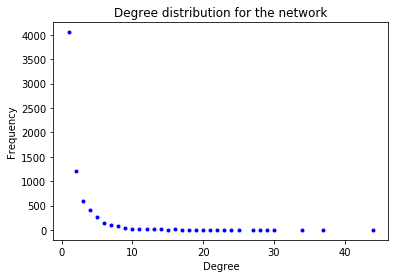

In [30]:
degree_seq = [d[1] for d in sorted_degree]
degreeCount = collections.Counter(degree_seq)
degreeCount = pd.DataFrame.from_dict(degreeCount, orient='index').reset_index()
fig = plt.figure()
ax = plt.gca()
ax.plot(degreeCount['index'], degreeCount[0], 'o', c='blue', markeredgecolor='none', markersize= 4)
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.title('Degree distribution for the network')

In [31]:
# WARNING: It's computationally expensive
betweenness = nx.betweenness_centrality(graph)
# Assign each to an attribute in your network
nx.set_node_attributes(graph, betweenness, 'betweenness')
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

for person, bw in sorted_betweenness[:15]:
    print(person, ' has betweeness: %.3f' %bw)

David Hilbert  has betweeness: 0.159
Max Born  has betweeness: 0.152
Hans Reichenbach  has betweeness: 0.121
Arnold Sommerfeld  has betweeness: 0.120
Hermann Helmholtz  has betweeness: 0.085
E. H. Moore  has betweeness: 0.073
J. J. Thomson  has betweeness: 0.071
Solomon Lefschetz  has betweeness: 0.070
John von Neumann  has betweeness: 0.058
Ludwig Boltzmann  has betweeness: 0.055
Gustav Kirchhoff  has betweeness: 0.052
Max Planck  has betweeness: 0.051
Hubert Newton  has betweeness: 0.051
Ferdinand von Lindemann  has betweeness: 0.049
Arthur W. Wright  has betweeness: 0.044


In [35]:
# WARNING: It's computationally expensive
eigenvector_centrality = nx.eigenvector_centrality(graph)
# Assign each to an attribute in your network
nx.set_node_attributes(graph, eigenvector_centrality, 'eigenvector_centrality')
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=itemgetter(1), reverse=True)

for person, ec in sorted_eigenvector_centrality[:15]:
    print(person, ' has eigenvector centrality: %.3f' %ec)

Arnold Sommerfeld  has eigenvector centrality: 0.578
Max Born  has eigenvector centrality: 0.214
Werner Heisenberg  has eigenvector centrality: 0.213
Wolfgang Pauli  has eigenvector centrality: 0.162
Hans Reichenbach  has eigenvector centrality: 0.158
Rudolph E. Peierls  has eigenvector centrality: 0.154
David Hilbert  has eigenvector centrality: 0.140
Ferdinand von Lindemann  has eigenvector centrality: 0.119
Gregor Wentzel  has eigenvector centrality: 0.110
Linus Pauling  has eigenvector centrality: 0.109
William V. Houston  has eigenvector centrality: 0.109
Hans Bethe  has eigenvector centrality: 0.105
J. J. Thomson  has eigenvector centrality: 0.103
Walter Heitler  has eigenvector centrality: 0.102
Fritz Sauter  has eigenvector centrality: 0.099


People with the most number of bridge edges

In [32]:
pd.DataFrame(list(nx.bridges(graph))).rename(columns={0: 'src', 1: 'dst'}).groupby('src').count().sort_values(by='dst', ascending=False).head(20)

,dst
src,
Dimitris Bertsimas,32
Franz Boas,25
Robert Solow,21
Arnold Sommerfeld,19
Alonzo Church,19
David Hilbert,18
John Archibald Wheeler,16
Felix Klein,15
Salomon Bochner,14


## DiGraph

In [33]:
digraph = nx.from_pandas_edgelist(supervision_df, 'supervisor', 'student', edge_attr=None, create_using = nx.DiGraph())
print(nx.info(digraph))

Name: 
Type: DiGraph
Number of nodes: 7070
Number of edges: 8071
Average in degree:   1.1416
Average out degree:   1.1416


In [37]:
betweenness = nx.betweenness_centrality(digraph)
# Assign each to an attribute in your network
nx.set_node_attributes(digraph, betweenness, 'betweenness')
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

for person, bw in sorted_betweenness[:15]:
    print(person, ' has betweeness: %.3f' %bw)

Joseph-Louis Lagrange  has betweeness: 0.002
Leonhard Euler  has betweeness: 0.002
Johann Bernoulli  has betweeness: 0.002
Siméon Poisson  has betweeness: 0.001
Felix Klein  has betweeness: 0.001
Peter Dirichlet  has betweeness: 0.001
Nikolaus Eglinger  has betweeness: 0.001
Emmanuel Stupanus  has betweeness: 0.001
Rudolf Lipschitz  has betweeness: 0.001
Ferdinand von Lindemann  has betweeness: 0.001
Carl Gauss  has betweeness: 0.001
Johann Pfaff  has betweeness: 0.001
Petrus Ryff  has betweeness: 0.001
Michel Chasles  has betweeness: 0.001
Theodor Zwinger  has betweeness: 0.001


In [68]:
def weak_eccentricity(G):
    # Exaclty like eccentricity, but when a node is unreachable
    # the distance is 0. This is only worth to use the max
    # eccentricity which otherwise is not possible on a
    # weakly connected directed graph
    order=G.order()

    e={}
    for n in G.nbunch_iter(None):
        length=nx.single_source_shortest_path_length(G,n)
        L = len(length)
        if L != order:
            L = 0
            
        e[n]=max(length.values())

    return e

In [72]:
eccentricity = weak_eccentricity(digraph)
# Assign each to an attribute in your network
nx.set_node_attributes(digraph, eccentricity, 'eccentricity')
sorted_eccentricity = sorted(eccentricity.items(), key=itemgetter(1), reverse=True)

for person, ecc in sorted_eccentricity[:10]:
    print(person, ' has eccentricity: %d' %ecc)

Marco Musuro  has eccentricity: 26
Nicoletto Vernia  has eccentricity: 26
Ognibene da Lonigo  has eccentricity: 26
Pietro Roccabonella  has eccentricity: 26
Giovanni Battista della Monte  has eccentricity: 25
Giovanni Manardo  has eccentricity: 25
Johannes Baptista Montanus  has eccentricity: 25
Niccolò Leoniceno  has eccentricity: 25
Pietro Pomponazzi  has eccentricity: 25
Antonio Musa Brassavola  has eccentricity: 24


In [83]:
dict(sorted_eccentricity)['Joseph-Louis Lagrange']

17

In [114]:
def subgraph(G, node):
    students = list(digraph.neighbors(node))
    advisors = list(digraph.predecessors(node))
    subG_nodes = [node] + students# + advisors
    return G.subgraph(subG_nodes)

In [122]:
sdg = subgraph(digraph, 'Marco Musuro')

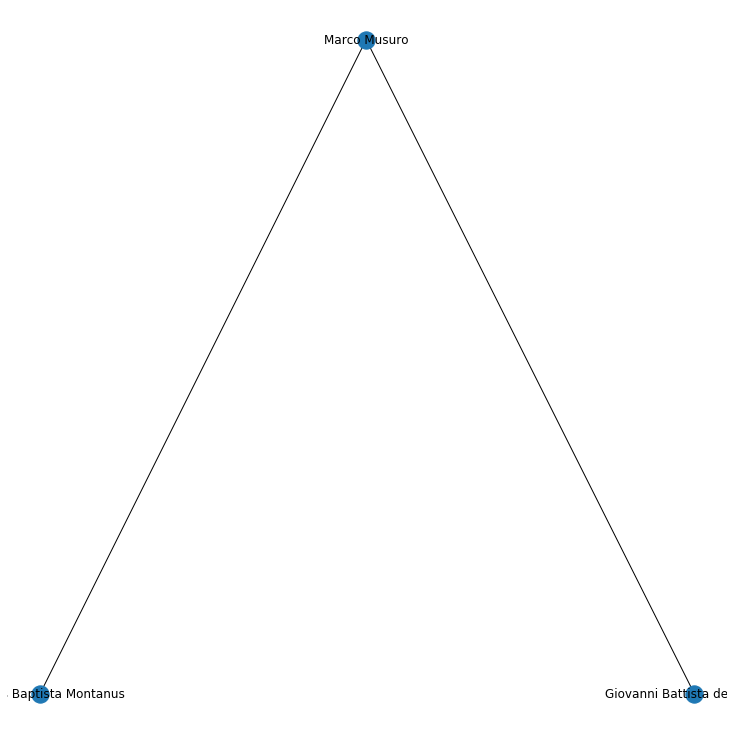

In [124]:
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

pos = graphviz_layout(sdg, prog='dot')
nx.draw(sdg, pos, with_labels=True, arrows=False)
plt.show()